Este programa lee una lista de tokens publicados como resultado de una votación y permite 

In [2]:
from base64 import b64encode,b64decode

from Crypto.Hash import SHA256
from Crypto.Signature import PKCS1_v1_5
from Crypto.PublicKey import RSA

import json
import numpy as np
import pylab as pl

In [3]:
# La llave pública de la autoridad que firma el certificado
public_key = """-----BEGIN PUBLIC KEY-----
MIICIjANBgkqhkiG9w0BAQEFAAOCAg8AMIICCgKCAgEAzlFznojCzNlfIG+gDEg4
NiVGQe7BFe3Z9oB2yUPDTOThbMw02/N2au+M5NFPgztdL5zjTstLIbxUZfPd+oAe
W2gQZTsNRPAUKi/kucdNAELmOD9C3fb5o261iEawkdCOaZg7kVwpxTdOEW4AnZSh
J5CgTFINecwGHf1sSlB6TJEd11I1SP1xKleQwY4G0lM6M/C/yY2lFLvAASJXAM7e
AClsENDHiWPX+BvnSCmSxLqx7kaYrxB765fn8Wpw+wr98rr2RjoTO/eRuz7RI5or
M7CVUXwM5FWuKP6tPkw3k9I2D0D0NyP0OwOpaDCLwEElyZ1ZpT2XY0zpdJdzrfFy
y4BFQBR7aM/3Z95XX0zEPwAuZ+9oaRZchd9xaqFhdHe3ZkZ2fkgMFsfrHVAD/qVp
rFLva9sJHtUicqXbzUUhuL7f+BXWeS5JJC3/PqjF+Vaj9lHXmbcynp0XPE4wFooe
lELVom0ogmy4TfqkY5F1mJC0ofivhAhEqi504GJbUvMH4Oji6U3f8+fzOvTiERba
BWhtut2iztz6ATPzQjXMXdSE7Ln5xDN+dMexnS1llelNctk8mZAafF81qbGXf3mp
i48jTksvmwdHRdEH3SBPBB/LQP4JrInEhcRo3pWSul9tlDZ1f2tS0mz+JO8KE7BN
N3gt2DSMEnLJ6Fj2D+3ccbkCAwEAAQ==
-----END PUBLIC KEY-----"""


stats = {'estudiante':[],'ayudante':[],'profesor':[]}
ids_certificado_valido = []
ids_certificado_novalido = []
ids_certificado_repetido = []

# Lee un archivo tokens.txt que contiene todos los tokens usados en la votación
tokens_txt = open("tokens.txt", "r").read()

# Separar los tokens en una lista
tokens_txt = tokens_txt.strip("#\n ") # quitamos los ### del inicio y final
tokens = tokens_txt.split("\n###\n###\n") # separamos todos los tokens

num_votos = len(tokens)

for token in tokens:
    parts = token.split("\n")
    message = bytes(parts[0],'utf-8')
    signature = bytes(parts[2],'utf-8')

    # Obtener un resumen del mensaje
    digest = SHA256.new()
    digest.update(message)

    # Generar el verificador de firmas
    rsapubkey = RSA.importKey(public_key) 
    verifier = PKCS1_v1_5.new(rsapubkey)

    # Verificar la firma
    verified = verifier.verify(digest, b64decode(signature))
    
    message_json = json.loads(message)
    id_certificado = message_json['id_certificado']
        
    if verified: # Certificado válido
        
        if id_certificado not in ids_certificado_valido:
            for rol,semestre in message_json['roles'].items():
                stats[rol].append(semestre)
            ids_certificado_valido.append(id_certificado)
        else:
            ids_certificado_repetido.append(id_certificado)
            
        
    else: #Certificado no válido
        ids_certificado_novalido.append(id_certificado)
        
        
# Si hay algún certificado repetido contamos sólo su primera aparición
# y las subsecuentes son contadas como repeticiones
print("Votos emitidos: %d"%num_votos)
print("Certificados válidos y únicos: %d"%len(ids_certificado_valido))
print("Certificados repetidos: %d"%len(ids_certificado_repetido))
print("Certificados no válidos: %d"%len(ids_certificado_novalido))

Votos emitidos: 6
Certificados válidos y únicos: 0
Certificados repetidos: 0
Certificados no válidos: 6


In [4]:
stats

{'estudiante': [], 'ayudante': [], 'profesor': []}

In [11]:
vals, freq = np.unique(np.array(stats['estudiante']), return_counts=True)

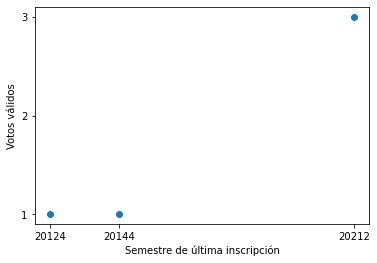

In [12]:
pl.plot(vals,freq,'o')
pl.xticks(vals)
pl.xlabel("Semestre de última inscripción")
pl.ylabel("Votos válidos")
pl.gca().yaxis.set_major_locator(pl.MaxNLocator(integer=True))